In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
#load the dataset
churn=pd.read_csv(r"E:\AIML INTERNSHIP\Datasets\Churn_Modelling.csv",header=0)
churn_bk=churn.copy()
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

exited_count = churn.Exited.value_counts()
print('Class 0:', exited_count[0])
print('Class 1:', exited_count[1])
print('Proportion:', round(exited_count[0] / exited_count[1], 2), ': 1')
print('Total Bank records:', len(churn))

Class 0: 7963
Class 1: 2037
Proportion: 3.91 : 1
Total Bank records: 10000


In [5]:
churn.duplicated().any()

False

In [6]:
#displayig Duplicat values with in dataset

churn_dup = churn[churn.duplicated(keep='last')]

#Displaying the duplicated values
churn_dup
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#delete the columsn which are nt influencing the target variable
#del churn['RowNumber']
#del churn['CustomerId']
#del churn['Surname']
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
churn.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
churn.Geography=churn['Geography'].map({'Spain':0,'Germany':1,'France':2})

In [10]:
churn.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
churn.Gender=churn.Gender.map({'Female':0,'Male':1})
#churn['Gender']=churn['Gender'].str.replace("Female",0)
#churn['Gender']=churn['Gender'].str.replace("Male",1)
#churn['Gender']=churn['Gender'].astype(int)

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [13]:
churn.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2804,648,2,0,44,2,0.00,2,1,1,58652.23,0
4605,530,2,0,34,8,0.00,2,0,1,141872.52,0
9283,562,2,0,27,3,0.00,2,1,0,28137.03,0
2316,649,1,0,50,5,155393.32,1,1,1,87351.42,1
9695,710,1,1,37,6,135795.63,1,0,1,46523.60,0


In [14]:
# Identify the independent and targrt (dependent) variables

IndepVar = []
for col in churn.columns:
    if col != 'Exited':
        IndepVar.append(col)
TargetVar ='Exited'

x = churn[IndepVar]
y = churn[TargetVar]

In [15]:
 # Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [16]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Logistic Regression Algorithm

In [17]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for  model

ModelLR = LogisticRegression()

# ModelLr = LogisticRegression(penalty='l2',dual=False,tol=0.0001,c=1.0,fit_intercept=True,Intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs','max_itr=100',multi_class='auto','verbose=0,warm_start=False,n_jobs=None',l1_ratio=None)
# Train the model with training dataset

ModelLR.fit(x_train,y_train)

# Predict the model with test dataset 

y_pred = ModelLR.predict(x_test)

y_pred_proba = ModelLR.predict_proba(x_test)

Confusion matrix : 
 [[ 111  473]
 [  77 2339]]
Outcome values : 
 111 473 77 2339
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.19      0.29       584
           0       0.83      0.97      0.89      2416

    accuracy                           0.82      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.78      0.82      0.78      3000

Accuracy : 81.7 %
Precision : 59.0 %
Recall : 19.0 %
F1 Score : 0.288
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 57.9 %
MCC : 0.258
roc_auc_score: 0.579


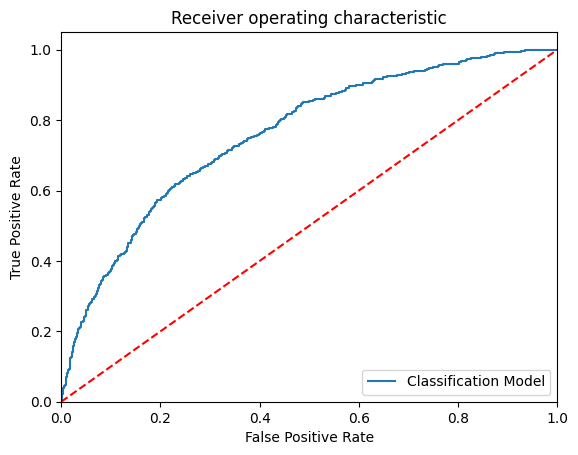

-----------------------------------------------------------------------------------------------------


In [18]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)



# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)




# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [19]:
#Display the Final result 

Results = pd.DataFrame({'Exited_A':y_test,'Exited_P':y_pred})

#Merge two Dataframes on index of both the dataframes

ResultsFinal = churn_bk.merge(Results,left_index=True,right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_A,Exited_P
1897,1898,15735428,Talbot,673,Spain,Female,37,0,0.00,2,0,0,82351.06,0,0,0
1844,1845,15699634,Howard,667,France,Female,48,2,0.00,2,1,1,148608.39,0,0,0
7699,7700,15622289,Rizzo,605,Spain,Female,36,9,0.00,2,0,1,35521.63,0,0,0
3412,3413,15782802,Beneventi,582,Germany,Male,26,6,114450.32,1,1,1,14081.64,0,0,0
321,322,15678910,Ts'ai,680,France,Female,30,8,141441.75,1,1,1,16278.97,0,0,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,0,0
7367,7368,15736399,Korovin,606,Spain,Male,42,10,0.00,2,1,0,177938.52,0,0,0
6338,6339,15784161,Hargreaves,583,Germany,Male,39,8,102945.01,1,0,0,52861.89,0,0,0
4450,4451,15791191,Mitchell,633,France,Male,59,2,103996.74,1,1,1,103159.11,0,0,0
5963,5964,15653521,Onuora,850,Germany,Female,40,7,104449.80,1,1,1,747.88,0,0,0
